# Preprocesamiento de datos

In [1]:
'''


'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_movies = pd.read_csv('datasets/movies.csv')
df_movies.shape[0]
df_movies.columns #Consultamos todos los nombres de campos del dataset

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description', 'id',
       'duration_int', 'duration_type', 'review_score'],
      dtype='object')

In [3]:
df_scores = pd.read_csv('datasets/scores_consolidados.csv')

## Instancias duplicadas

In [4]:
#Verificamos la cantidad total de registros del archivo movies
print('Total registros en movies:',df_movies.shape[0])

Total registros en movies: 22998


In [5]:
df_movies[df_movies.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,id,duration_int,duration_type,review_score


Observamos que no hay filas duplicadas

In [6]:
df_scores[df_scores.duplicated()] #Error de desbordamiento de memoria, el archivo es muy grande.

,userId,rating,timestamp,movieId
54627,567,4.0,1490189817,as978
56579,596,3.0,995944248,ns3435
128511,1284,4.0,1001117552,hs31
264873,2762,4.0,1013393066,ns915
466918,4844,4.0,968205147,as2299
...,...,...,...,...
10740961,121473,5.0,880112602,as8488
10841285,122600,4.0,1500238507,ns2458
10906581,123240,3.5,1490066771,ns1788
10907578,123253,5.0,1005189191,hs745


## Valores Faltantes

In [7]:
#pip install missingno 
import missingno as msno

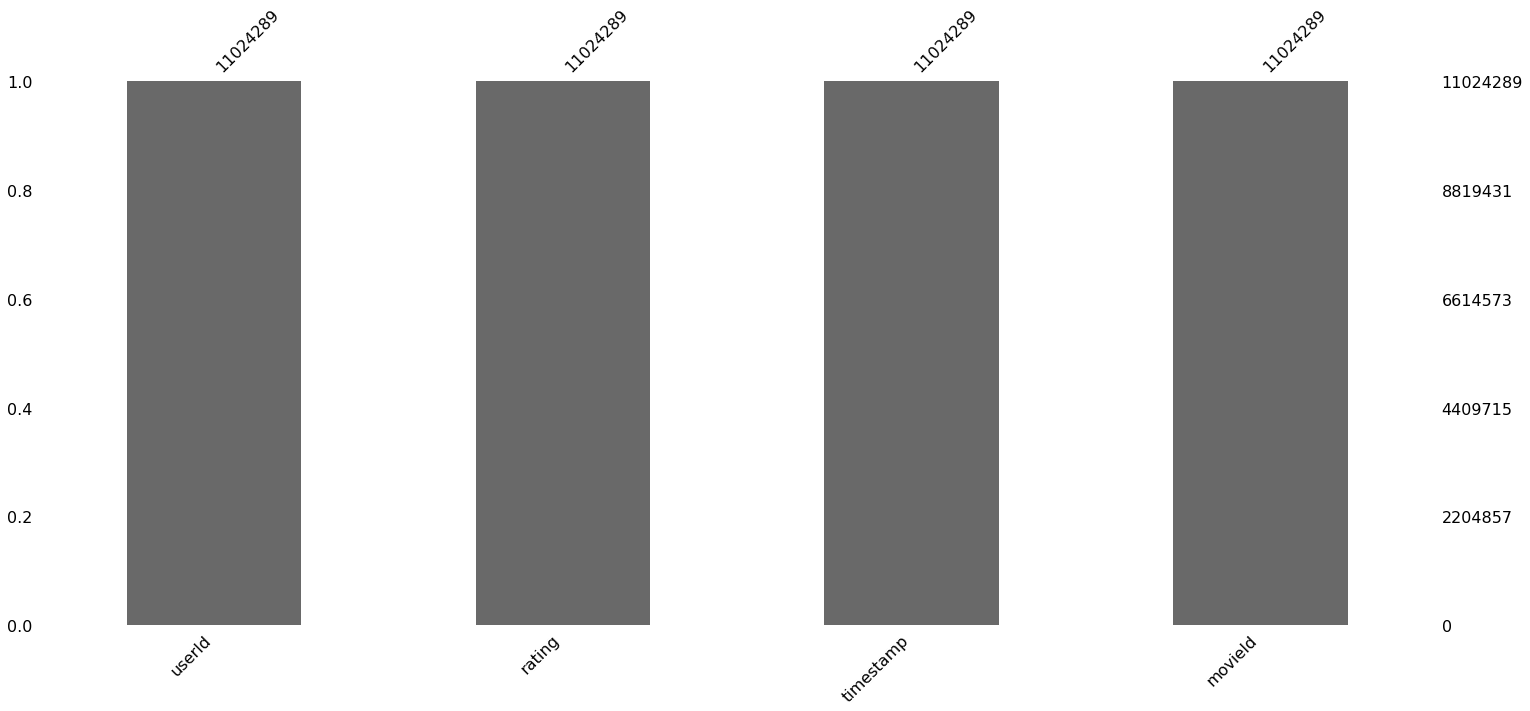

In [8]:
msno.bar(df_scores)
plt.show()

En el dataframe df_scores no hay valores faltantes. Observemos el dataframe df_movies:

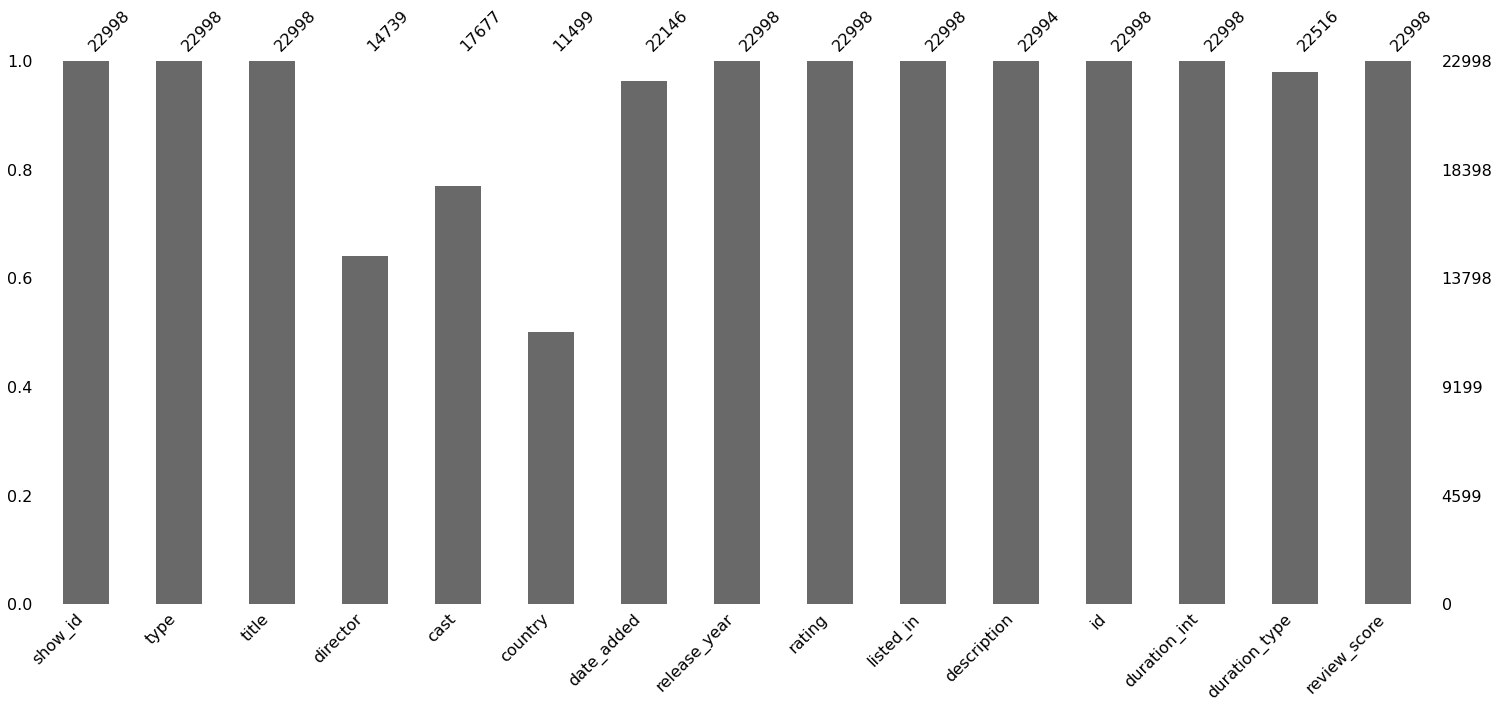

In [9]:
msno.bar(df_movies)
plt.show()

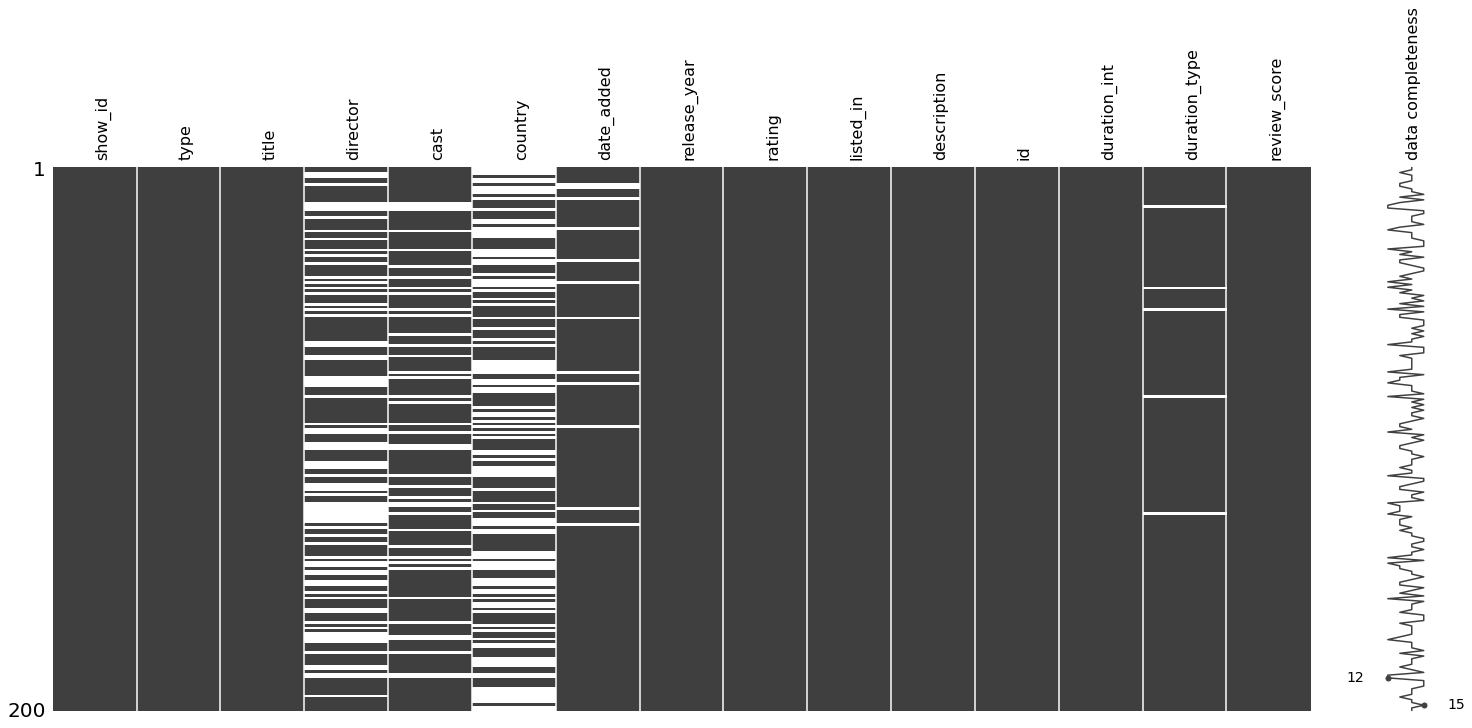

In [10]:
# Tomamos 200 muestras al azar de nuestra población
msno.matrix(df_movies.sample(200), labels = True, label_rotation = 90)
plt.show()

In [11]:
#Analizamos la columna country que es la que presenta mas datos nulos
print('Porcentaje de valores faltantes de la variable country:', (df_movies.country.isnull().sum()/len(df_movies)) * 100, '%')

Porcentaje de valores faltantes de la variable country: 50.0 %


In [12]:
# Veamos los valores que asume coutry
df_movies.country.value_counts()

united states                                                  4997
india                                                          1203
united kingdom                                                  583
japan                                                           515
canada                                                          237
                                                               ... 
lebanon, united arab emirates, france, switzerland, germany       1
france, belgium, italy                                            1
lebanon, united states, united arab emirates                      1
lebanon, france                                                   1
united arab emirates, jordan                                      1
Name: country, Length: 886, dtype: int64

Observamos que la información del campo country NO es importante asi que lo imputamos con un valor simbólico para nuestro estudio y mantenemos esas filas  

In [13]:
# Colocamos NC (No Country) en las filas donde tengamos valores faltantes en la columna country
df_movies.country.replace(np.nan, 'NC', inplace = True)

In [14]:
df_movies.country.value_counts()

NC                                                             11499
united states                                                   4997
india                                                           1203
united kingdom                                                   583
japan                                                            515
                                                               ...  
lebanon, united arab emirates, france, switzerland, germany        1
france, belgium, italy                                             1
lebanon, united states, united arab emirates                       1
lebanon, france                                                    1
united arab emirates, jordan                                       1
Name: country, Length: 887, dtype: int64

In [15]:
#Analizamos la columna director que es la segunda columna que presenta mas datos nulos
print('Porcentaje de valores faltantes de la variable director:', round((df_movies.director.isnull().sum()/len(df_movies)) * 100,2),'%')

Porcentaje de valores faltantes de la variable director: 35.91 %


In [16]:
# Veamos los valores asume director
df_movies.director.value_counts()

mark knight              113
cannis holder             61
jay chapman               46
moonbug entertainment     37
arthur van merwijk        30
                        ... 
charles wilkinson          1
dominic brunt              1
sean breathnach            1
cindy jansen               1
mozez singh                1
Name: director, Length: 10095, dtype: int64

Observamos que la información del campo director NO es importante asi que lo imputamos con un valor simbólico para nuestro estudio y mantenemos esas filas  

In [17]:
# Colocamos ND (No Director) en las filas donde tengamos valores faltantes en la columna director
df_movies.director.replace(np.nan, 'ND', inplace = True)

In [18]:
df_movies.director.value_counts()

ND                       8259
mark knight               113
cannis holder              61
jay chapman                46
moonbug entertainment      37
                         ... 
charles wilkinson           1
dominic brunt               1
sean breathnach             1
cindy jansen                1
mozez singh                 1
Name: director, Length: 10096, dtype: int64

In [19]:
#Analizamos la columna cast que es la tercera columna que presenta mas datos nulos
print('Porcentaje de valores faltantes de la variable cast:', round((df_movies.cast.isnull().sum()/len(df_movies)) * 100,2),'%')

Porcentaje de valores faltantes de la variable cast: 23.14 %


In [20]:
# Veamos los valores asume cast
df_movies.cast.value_counts()

maggie binkley                                                                                                                           56
1                                                                                                                                        34
anne-marie newland                                                                                                                       24
david attenborough                                                                                                                       22
cassandra peterson                                                                                                                       21
                                                                                                                                         ..
mohanlal, gautami, viswant duddumpudi, anisha ambrose, p. balachandran, joy mathew, raina rao                                             1
charl washington, co

Observamos que la información del campo cast NO es importante asi que lo imputamos con un valor simbólico para nuestro estudio y mantenemos esas filas  

In [21]:
# Colocamos NC (No Cast) en las filas donde tengamos valores faltantes en la columna cast
df_movies.cast.replace(np.nan, 'NC', inplace = True)

In [22]:
df_movies.to_csv('datasets\\movies_sin_nulos.csv', header=True, index=False)


## Valores atípicos

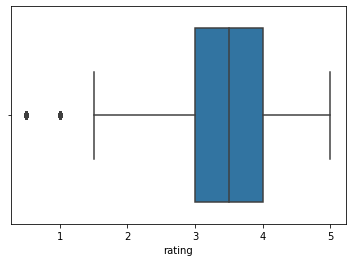

In [23]:
#Campos con valores (máximos) atípicos: rating
sns.boxplot(x = 'rating',  data= df_scores )
plt.show()

No observamos valores atipicos en el dataframe df_scores ya que estan en el rango correcto [0,5]. Estudiemos el dataframe df_movies:

Tomamos la columna release_year

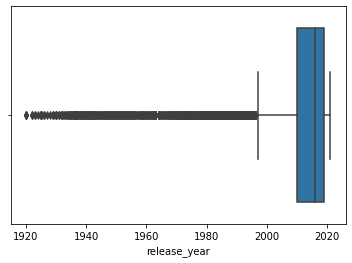

In [28]:
#Campos con valores (máximos) atípicos: release_year
sns.boxplot(x = 'release_year',  data= df_movies )
plt.show()

In [ ]:
# Se ejecuto dos veces la eliminacion de Outliers para eliminar los valores atipicos
Q1 = df_movies['release_year'].quantile(0.25)
Q3 = df_movies['release_year'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

In [ ]:
print('Cantidad de registros totales:', df_movies.shape[0])
print('Cantidad de outliers:', df_movies[(df_movies['release_year']<BI) | (df_movies['release_year']>BS)].shape[0] )

Eliminamos los outliers

In [ ]:
out_release_year = (df_movies['release_year']<BI) | (df_movies['release_year']>BS) 

df_movies = df_movies[~out_release_year]

In [ ]:
print('Tamaño del dataset, luego de eliminar outliers en release_year:', df_movies.shape[0])

In [ ]:
#Campos con valores (máximos) atípicos: release_year
sns.boxplot(x = 'release_year',  data= df_movies )
plt.show()

In [29]:
#Hacemos una copia de respaldo de las trasnformaciones realizadas
df_movies.to_csv('datasets\movies_sin_outliers.csv', header=True, index=False)


Realizamos todos los pasos anteriores para cada uno del resto de campos en los cuales detectamos valores atípicos

In [ ]:
#Almacenamos los cambios hechos sobre el dataframe en un archivo llamado movies.parquet
#df_movies.to_parquet('datasets/movies.parquet')